In [2]:
%matplotlib inline

In [3]:
from astropy.io import fits
import matplotlib.pylab as plt
import numpy as np
import pandas as pd
import os
import matplotlib.ticker as mtick

In [4]:
apf_file = fits.open('rj237.279.fits')

In [5]:
image = apf_file[0].data

In [6]:
with fits.open('rj237.279.fits') as apf_file:
    apf_file.info()

Filename: rj237.279.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     722   (4021, 16)   float32   


In [7]:
with fits.open('rj237.279.fits') as apf_file:
    apf_file.verify('fix')
    data = apf_file[0].data

In [8]:
data

array([[   41.   , 14207.443, 13784.027, ..., 10567.554, 10474.454,
         1000.5  ],
       [ 9477.544,  8198.749,  8497.632, ..., 11317.189, 11261.947,
         1000.5  ],
       [10623.441,  9665.105,  8589.952, ..., 11160.164, 10824.264,
         1000.5  ],
       ...,
       [22477.898, 22896.611, 23197.87 , ..., 15350.153, 14983.023,
         1000.5  ],
       [23424.611, 23456.414, 23925.307, ..., 15900.199, 15199.483,
         1000.5  ],
       [22230.703, 22585.188, 22631.484, ..., 15815.556, 14971.302,
         1000.5  ]], dtype=float32)

In [9]:
print(data[0])

[   41.    14207.443 13784.027 ... 10567.554 10474.454  1000.5  ]


In [10]:
data[-1,-1]

1000.5

Text(0.5, 1.0, '2D array data')

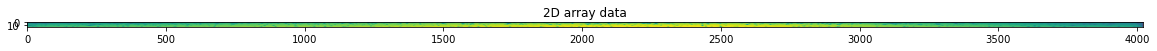

In [11]:
plt.figure(figsize=(20,20))
plt.imshow(image)
plt.title('2D array data')

Text(0.5, 1.0, '2D array data w/ contrast')

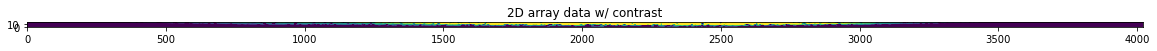

In [12]:
plt.figure(figsize=(20,20))
plt.imshow(image, vmin = np.median(image), vmax = np.median(image) * 1.2, origin = 'lower')
plt.title('2D array data w/ contrast')

Text(0.5, 1.0, '2D array w/ contrast and flipped')

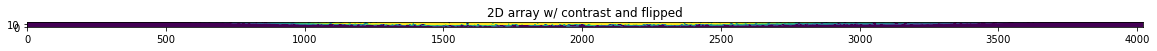

In [13]:
image_flip = np.fliplr(image)
plt.figure(figsize=(20,20))
plt.imshow(image_flip, vmin = np.median(image_flip), vmax = np.median(image_flip) * 1.2, origin = 'lower')
plt.title('2D array w/ contrast and flipped')

Text(0.5, 1.0, 'Final 2D array (Our Spectrum!)')

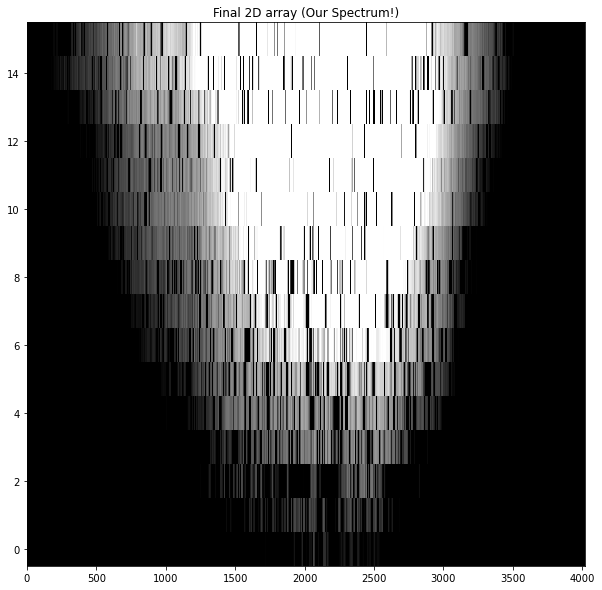

In [14]:
plt.figure(figsize=(10,10))
plt.imshow(image, cmap = 'gray', aspect = 'auto', interpolation = 'nearest',
    vmin = np.median(image), vmax = np.median(image) * 1.2, origin = 'lower')
plt.title('Final 2D array (Our Spectrum!)')

Text(0.5, 1.0, 'small patch [10:11, 1500:2000] of telluric lines')

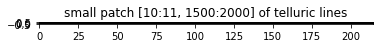

In [15]:
patch = image_flip[11:12, 37:252]
# ^ Cutout of our 2D array, like a patch out of a quilt
plt.imshow(patch, cmap = 'gray', 
           vmin = np.median(image_flip), vmax = np.median(image_flip) *1.2, origin = 'lower')
plt.title('small patch [10:11, 1500:2000] of telluric lines')

Text(0.5, 1.0, 'small patch [11:12, 37:252] of telluric lines')

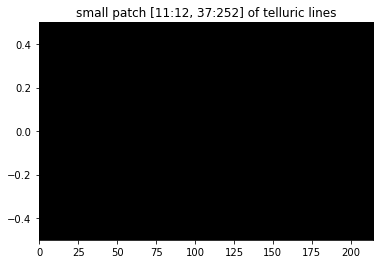

In [16]:
plt.imshow(image_flip[11:12, 37:252], cmap = 'gray', aspect = 'auto', interpolation = 'nearest',
           vmin = np.median(image_flip), vmax = np.median(image_flip) *1.2, origin = 'lower')
plt.title('small patch [11:12, 37:252] of telluric lines')

In [17]:
patch = image_flip[11:12, 37:252]
patch.size

215

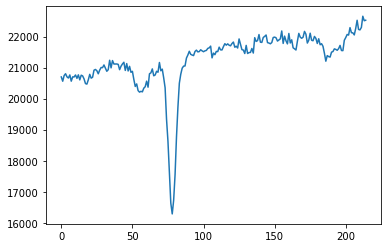

In [18]:
telluric_1D = np.sum(patch, axis = 0)
plt.plot(telluric_1D)

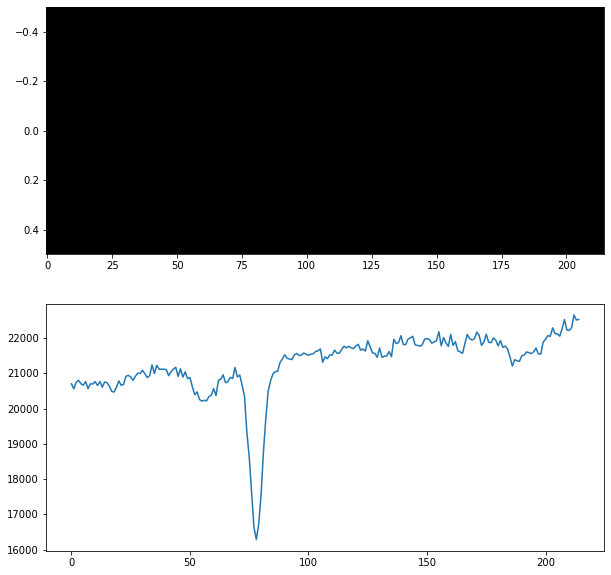

In [19]:
plt.figure(figsize =(10,10))
plt.subplot(2,1,1)
plt.imshow(image_flip[11:12,37:252], cmap = 'gray', aspect = 'auto', interpolation = 'nearest',
           vmin = np.median(image_flip), vmax = np.median(image_flip) *1.2)
plt.subplot(2,1,2)
plt.plot(telluric_1D)

In [20]:
bias = np.median(image_flip[-30:])
print(bias)

26493.217


Text(0.5, 1.0, 'Telluric Absorption (Adjusted) [11:12, 37:252]')

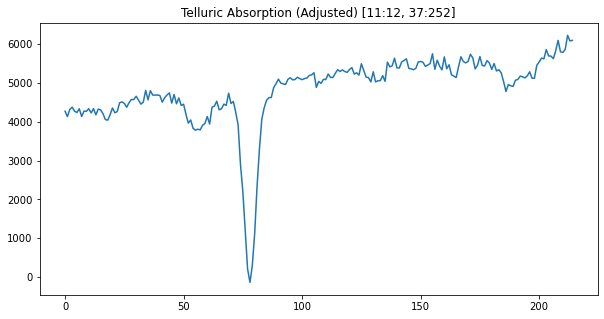

In [21]:
plt.figure(figsize=(10,5))
telluric_1D_adj = telluric_1D - (0.62*bias)
plt.plot(telluric_1D_adj)
plt.title('Telluric Absorption (Adjusted) [11:12, 37:252]')

In [22]:
def cut_n_zoom(x1,x2,y1,y2):
    plt.figure(figsize=(10,10))
    plt.imshow(image_flip[x1:x2, y1:y2], cmap = 'gray', aspect = 'auto', 
               vmin = np.median(image), vmax = np.median(image) *1.2, origin = 'lower')
    plt.show()

In [23]:
#cutting out the patch with the absorption feature
sodium_patch = image_flip[11:12,37:252] 
#take the sum along the columns, and subtract 15 biases
sodium_patch_1D_without_bias = np.sum(sodium_patch, axis = 0) - bias*0.5

Text(0.5, 1.0, 'Sodium')

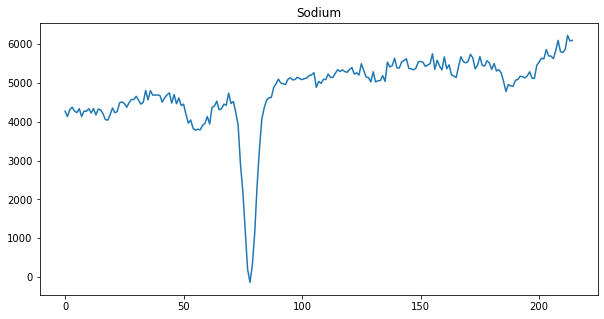

In [24]:
# Plotting H-alpha absorption line
plt.figure(figsize=(10,5))
plt.plot(np.sum(sodium_patch, axis = 0) - bias*0.62)
plt.title('Sodium')

Text(0.5, 1.0, 'small patch [2:3, 1500:1750] of telluric lines')

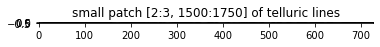

In [25]:
patch = image_flip[2:3, 1974:2702]
# ^ Cutout of our 2D array, like a patch out of a quilt
plt.imshow(patch, cmap = 'gray', 
           vmin = np.median(image_flip), vmax = np.median(image_flip) *1.2, origin = 'lower')
plt.title('small patch [2:3, 1500:1750] of telluric lines')

Text(0.5, 1.0, 'small patch [11:12, 1500:1750] of telluric lines')

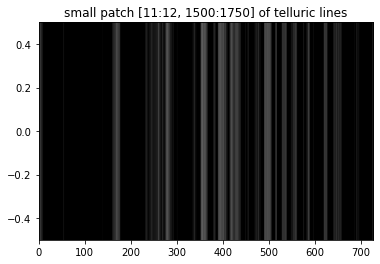

In [26]:
plt.imshow(image_flip[2:3, 1974:2702], cmap = 'gray', aspect = 'auto', interpolation = 'nearest',
           vmin = np.median(image_flip), vmax = np.median(image_flip) *1.2, origin = 'lower')
plt.title('small patch [11:12, 1500:1750] of telluric lines')

In [27]:
patch = image_flip[2:3, 1974:2702]
patch.size

728

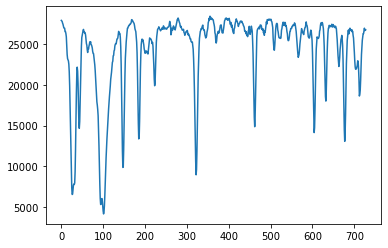

In [28]:
telluric_1D2 = np.sum(patch, axis = 0)
plt.plot(telluric_1D2)

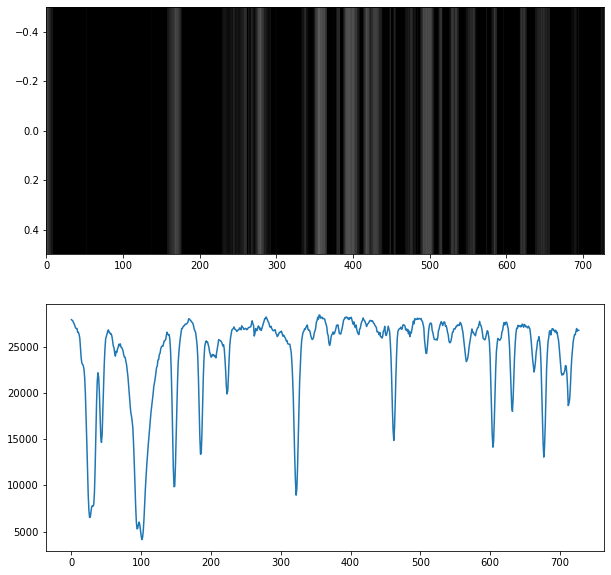

In [29]:
plt.figure(figsize =(10,10))
plt.subplot(2,1,1)
plt.imshow(image_flip[2:3,1974:2702], cmap = 'gray', aspect = 'auto', interpolation = 'nearest',
           vmin = np.median(image_flip), vmax = np.median(image_flip) *1.2)
plt.subplot(2,1,2)
plt.plot(telluric_1D2)

In [30]:
bias = np.median(image_flip[-30:])
print(bias)

26493.217


Text(0.5, 1.0, 'Telluric Absorption (Adjusted) [10:11, 1500:2000]')

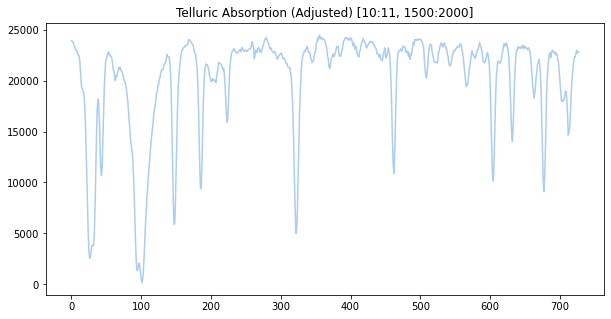

In [31]:
plt.figure(figsize=(10,5))
telluric_1D2_adj = telluric_1D2 - (0.15*bias)
plt.plot(telluric_1D2_adj, "#abcdef")
plt.title('Telluric Absorption (Adjusted) [10:11, 1500:2000]')

In [32]:
def cut_n_zoom(x1,x2,y1,y2):
    plt.figure(figsize=(10,10))
    plt.imshow(image_flip[x1:x2, y1:y2], cmap = 'gray', aspect = 'auto', 
               vmin = np.median(image), vmax = np.median(image) *1.2, origin = 'lower')
    plt.show()

In [33]:
#cutting out the patch with the absorption feature
magnesium_patch = image_flip[2:3,1974:2702] 
#take the sum along the columns, and subtract 15 biases
magnesium_patch_1D_without_bias = np.sum(magnesium_patch, axis = 0) - bias*0.15

Text(0.5, 1.0, 'Magnesium')

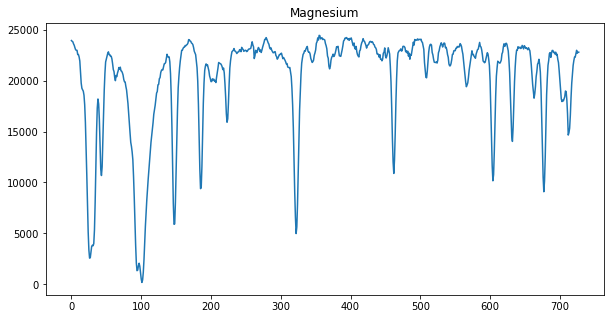

In [34]:
# Plotting H-alpha absorption line
plt.figure(figsize=(10,5))
plt.plot(np.sum(magnesium_patch, axis = 0) - bias*0.15)
plt.title('Magnesium')

Text(0.5, 1.0, 'small patch [6:7, 1000:1500] of telluric lines')

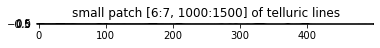

In [35]:
patch = image_flip[6:7, 1000:1500]
# ^ Cutout of our 2D array, like a patch out of a quilt
plt.imshow(patch, cmap = 'gray', 
           vmin = np.median(image_flip), vmax = np.median(image_flip) *1.2, origin = 'lower')
plt.title('small patch [6:7, 1000:1500] of telluric lines')

Text(0.5, 1.0, 'small patch [6:7, 1000:1500] of telluric lines')

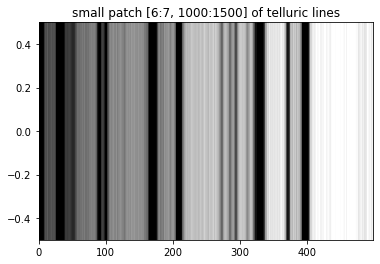

In [36]:
plt.imshow(image_flip[6:7, 1000:1500], cmap = 'gray', aspect = 'auto', interpolation = 'nearest',
           vmin = np.median(image_flip), vmax = np.median(image_flip) *1.2, origin = 'lower')
plt.title('small patch [6:7, 1000:1500] of telluric lines')

In [37]:
patch = image_flip[6:7, 1000:1500]
patch.size

500

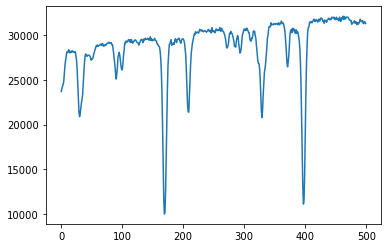

In [38]:
telluric_1D3 = np.sum(patch, axis = 0)
plt.plot(telluric_1D3)

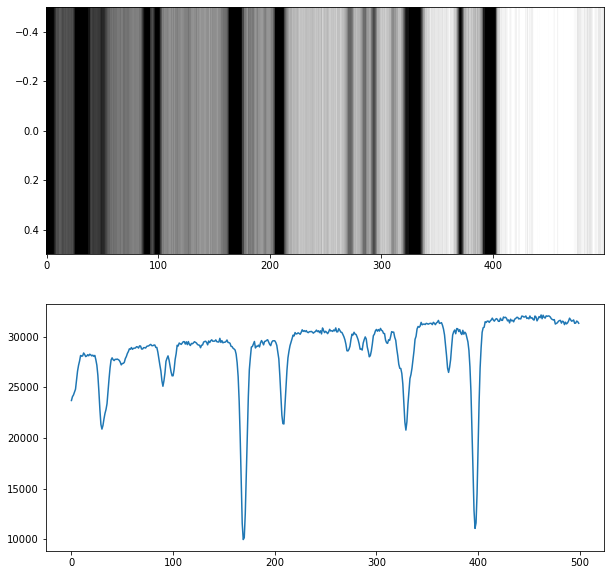

In [39]:
plt.figure(figsize =(10,10))
plt.subplot(2,1,1)
plt.imshow(image_flip[6:7,1000:1500], cmap = 'gray', aspect = 'auto', interpolation = 'nearest',
           vmin = np.median(image_flip), vmax = np.median(image_flip) *1.2)
plt.subplot(2,1,2)
plt.plot(telluric_1D3)

In [40]:
bias = np.median(image_flip[-30:])
print(bias)

26493.217


Text(0.5, 1.0, 'Telluric Absorption (Adjusted) [6:7, 1000:1500]')

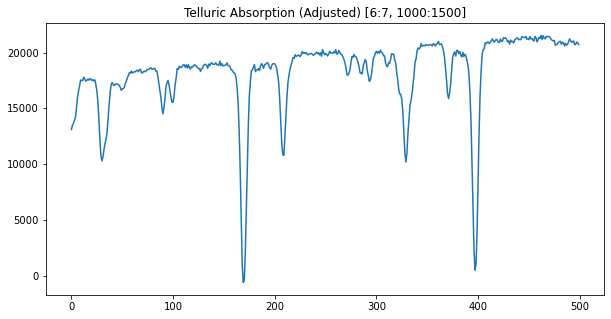

In [41]:
plt.figure(figsize=(10,5))
telluric_1D3_adj = telluric_1D3 - (0.4*bias)
plt.plot(telluric_1D3_adj)
plt.title('Telluric Absorption (Adjusted) [6:7, 1000:1500]')

In [42]:
def cut_n_zoom(x1,x2,y1,y2):
    plt.figure(figsize=(10,10))
    plt.imshow(image_flip[x1:x2, y1:y2], cmap = 'gray', aspect = 'auto', 
               vmin = np.median(image), vmax = np.median(image) *1.2, origin = 'lower')
    plt.show()

In [43]:
#cutting out the patch with the absorption feature
mercury_patch = image_flip[6:7,1000:1500] 
#take the sum along the columns, and subtract 15 biases
mercury_patch_1D_without_bias = np.sum(mercury_patch, axis = 0) - bias*0.4

Text(0.5, 1.0, 'Mercury')

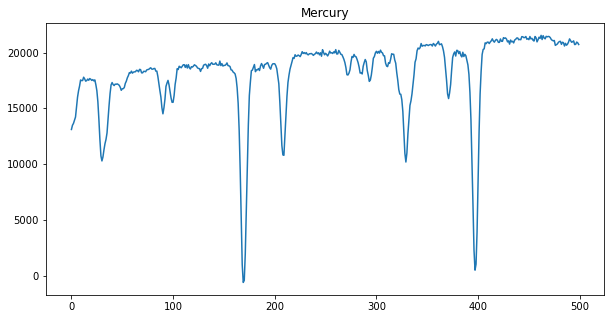

In [44]:
# Plotting H-alpha absorption line
plt.figure(figsize=(10,5))
plt.plot(np.sum(mercury_patch, axis = 0) - bias*0.4)
plt.title('Mercury')